[IPython Notebook](apsidal_motion.ipynb) |  [Python Script](apsidal_motion.py)

Apsidal Motion
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


In order for apsidal motion to be apparent, we need an eccentric system that is precessing.

In [3]:
b['ecc'] = 0.2

Let's set a very noticeable rate of precession.

In [4]:
b['dperdt'] = 2.0 * u.deg/u.d

We'll add LC, ORB, and ETV datasets to see how the apsidal motion affects each.  We'll need to sample over several orbits of the binary (which has a period of 3 days, by default).

In [5]:
b.add_dataset('LC', time=np.linspace(0,3,101), dataset='lc01')
b.add_dataset('LC', time=np.linspace(9,12,101), dataset='lc02')

<ParameterSet: 18 parameters | methods: LC, LC_dep>

In [6]:
b.add_dataset('ORB', time=np.linspace(0,12,401), dataset='orb01')

<ParameterSet: 3 parameters | components: _default, primary, secondary>

In [7]:
b.add_dataset('ETV', N=np.arange(0,10,1), dataset='etv01')

<ParameterSet: 19 parameters | contexts: dataset, constraint>

In [8]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1862: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  the_grid = cmarching.discretize(delta, maxpoints, *mesh_args)[:-2]
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/mesh.py:1145: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  new_ta

<ParameterSet: 26 parameters | methods: ORB, ETV, LC>

Influence on Oribits (positions)
-----------------

Let's plot the orbit from above and highlight the positions of each star at each cycle (times 0, 3, 6, and 9).

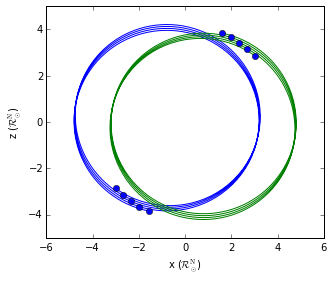

In [9]:
axs, artists = b['orb01@model'].plot(y='z', time=[0,3,6,9,12])

Influence on Light Curves (fluxes)
-------------------

Now looking at the light curve, we can see that this is resulting in the eclipses moving in phase-space.  We'll also include ticks for each of the computed eclipse times from the ETV dataset.

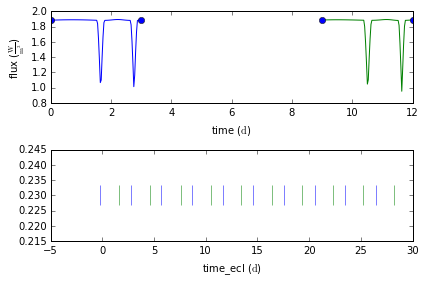

In [10]:
axs, artists = b['lc01@model'].plot(time=[0,3])
axs, artists = b['lc02@model'].plot(time=[9,12]) 
axs, artists = b['etv01@model'].plot(x='time_ecl', y=0.23)

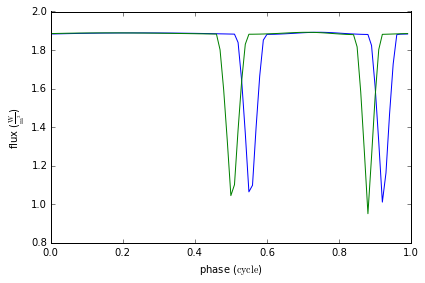

In [11]:
axs, artists = b['lc01@model'].plot(x='phase')
axs, artists = b['lc02@model'].plot(x='phase')

Influence on ETVs (timings)
----------------

The eclipses getting closer to each other in phase-space should then also show in the ETVs

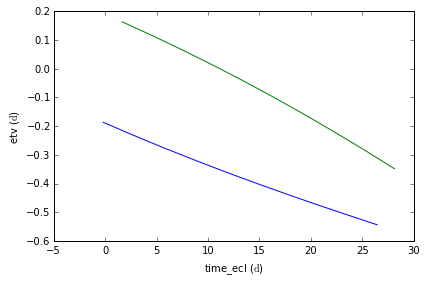

In [12]:
axs, artists = b['etv01@model'].plot()